# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Annisa Permatasari Ayuningtyas
- Email: annisapermatasaria@gmail.com
- Id Dicoding:annisapa

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Apakah kondisi cuaca memengaruhi banyaknya pengguna Bike Sharing?
- pertanyaan 2 : Pada hari apakah pengguna banyak menggunakan layanan Bike Sharing?

## Menyaipkan semua library yang dibuthkan

In [3]:
import pandas as pd

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Dicoding DS/Bike-sharing-dataset.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Dicoding DS/Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


### Assessing Data

In [6]:
bike_sharing = pd.read_csv('day.csv')

In [7]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

In [8]:
bike_sharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike_sharing.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [10]:
df = bike_sharing

season_values = {1:'Springer', 2:'Summer',3:'Fall', 4: 'Winter'}
df['seasons'] = df.season.map(season_values)

day_values = {1:'Monday',2:'Tuesday', 3:'Wednesday',4:'Thursday', 5: 'Friday',6:'Saturday',0:'Sunday'}
df['day'] = df.weekday.map(day_values)

weather_values = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy',2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
                , 3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
df['weather'] = df.weathersit.map(weather_values)

month_values = {1:'January',2:'February', 3:'March',4:'April', 5: 'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['month'] = df.mnth.map(month_values)

bike_sharing.drop('instant', axis=1, inplace=True)
df['temp'] = round(df['temp']*41,1)
df['atemp'] = round(df['atemp']*50,1)
df['hum'] = round(df['hum']*100,1)
df['windspeed'] = round(df['windspeed']*100,1)

df.drop(['yr','holiday'], axis=1)

,dteday,season,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons,day,weather,month
0,2011-01-01,1,1,6,0,2,14.1,18.2,80.6,16.0,331,654,985,Springer,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",January
1,2011-01-02,1,1,0,0,2,14.9,17.7,69.6,24.9,131,670,801,Springer,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",January
2,2011-01-03,1,1,1,1,1,8.1,9.5,43.7,24.8,120,1229,1349,Springer,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January
3,2011-01-04,1,1,2,1,1,8.2,10.6,59.0,16.0,108,1454,1562,Springer,Tuesday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January
4,2011-01-05,1,1,3,1,1,9.3,11.5,43.7,18.7,82,1518,1600,Springer,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,12,4,1,2,10.4,11.3,65.3,35.0,247,1867,2114,Springer,Thursday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",December
727,2012-12-28,1,12,5,1,2,10.4,12.8,59.0,15.5,644,2451,3095,Springer,Friday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",December
728,2012-12-29,1,12,6,0,2,10.4,12.1,75.3,12.4,159,1182,1341,Springer,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",December
729,2012-12-30,1,12,0,0,1,10.5,11.6,48.3,35.1,364,1432,1796,Springer,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy",December


In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons,day,weather,month
0,2011-01-01,1,0,1,0,6,0,2,14.1,18.2,80.6,16.0,331,654,985,Springer,Saturday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",January
1,2011-01-02,1,0,1,0,0,0,2,14.9,17.7,69.6,24.9,131,670,801,Springer,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",January
2,2011-01-03,1,0,1,0,1,1,1,8.1,9.5,43.7,24.8,120,1229,1349,Springer,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January
3,2011-01-04,1,0,1,0,2,1,1,8.2,10.6,59.0,16.0,108,1454,1562,Springer,Tuesday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January
4,2011-01-05,1,0,1,0,3,1,1,9.3,11.5,43.7,18.7,82,1518,1600,Springer,Wednesday,"Clear, Few clouds, Partly cloudy, Partly cloudy",January


## Exploratory Data Analysis (EDA)

### Explore ...

<Axes: ylabel='Total'>

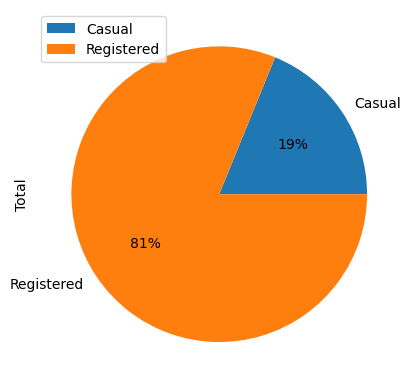

In [12]:
df_status = pd.DataFrame({'Status' : ['Registered','Casual'],'Total'
              :[(df['registered'].sum()),(df['casual'].sum())]})

df_status.groupby(['Status']).sum().plot(
    kind='pie', y='Total', autopct='%1.0f%%')

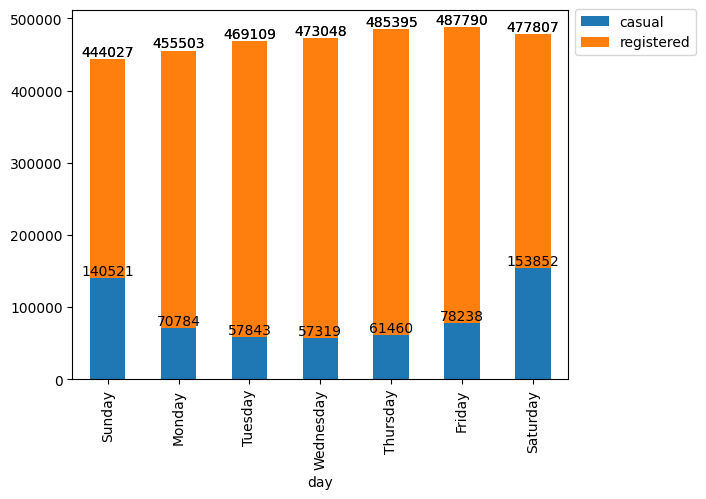

In [13]:
df_day = df.groupby(by=["weekday","day"],as_index=False)[["casual","registered"]].sum()
viz_day = df_day.plot(x='day',y=['casual','registered'],kind="bar",stacked=True)

for container in viz_day.containers:
    viz_day.bar_label(container)
viz_day.bar_label(container)
viz_day.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

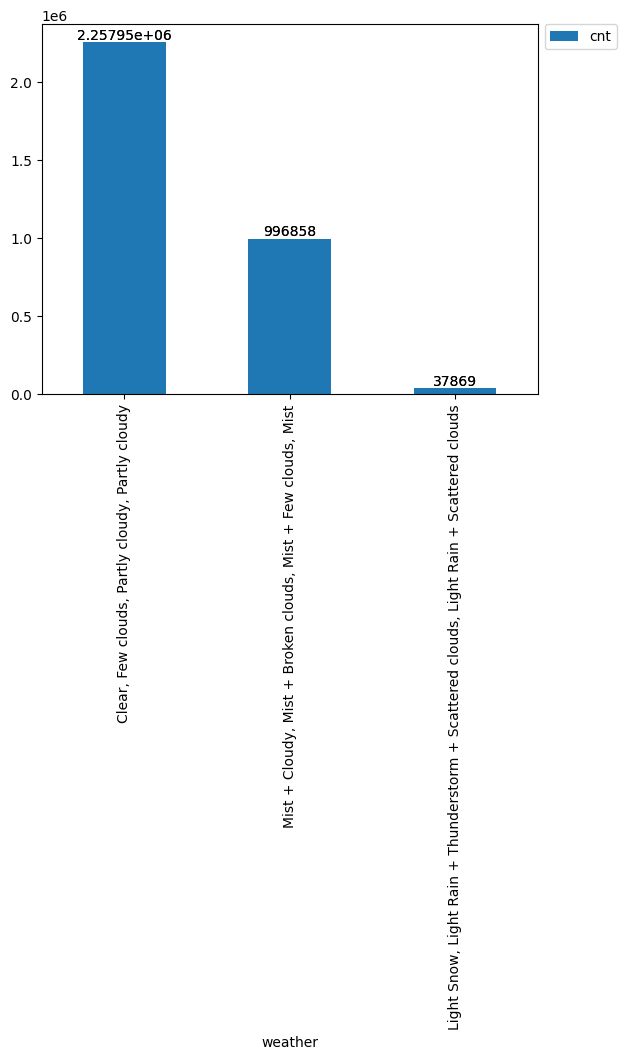

In [14]:
df_weather = df.groupby(by=["weathersit","weather"],as_index=False)[["cnt"]].sum()
viz_weather = df_weather.plot(x='weather',y=['cnt'],kind="bar",stacked=True)

for container in viz_weather.containers:
    viz_weather.bar_label(container)
viz_weather.bar_label(container)
viz_weather.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

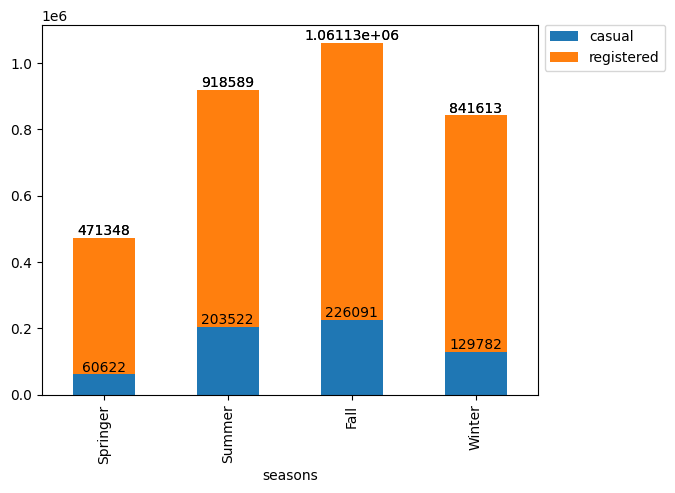

In [15]:
df_season = df.groupby(by=["season","seasons"],as_index=False)[["casual","registered"]].sum()
viz_season = df_season.plot(x='seasons',y=['casual','registered'],kind="bar",stacked=True)

for container in viz_season.containers:
    viz_season.bar_label(container)
viz_season.bar_label(container)
viz_season.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

<Axes: >

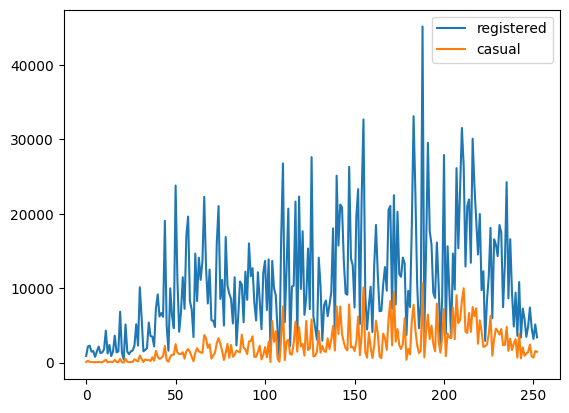

In [16]:
df_temp = df.groupby(by=["temp"],as_index=False)[["casual","registered","cnt"]].sum()
df_temp.sort_values('cnt',ascending=False)

df_temp.plot(y=["registered", "casual"],kind="line")

<Axes: >

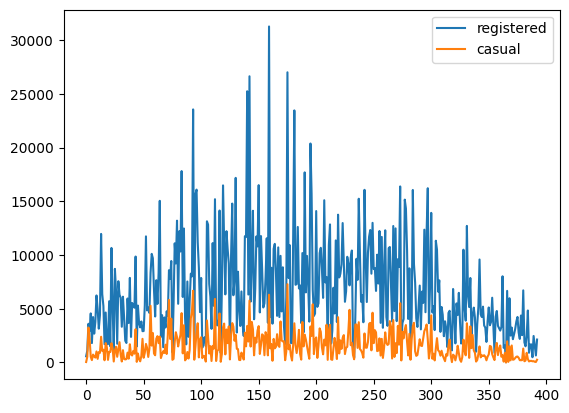

In [17]:
df_hum = df.groupby(by=["hum"],as_index=False)[["casual","registered","cnt"]].sum()
df_hum.sort_values('cnt',ascending=False)

df_hum.plot(y=["registered", "casual"],kind="line")

<Axes: >

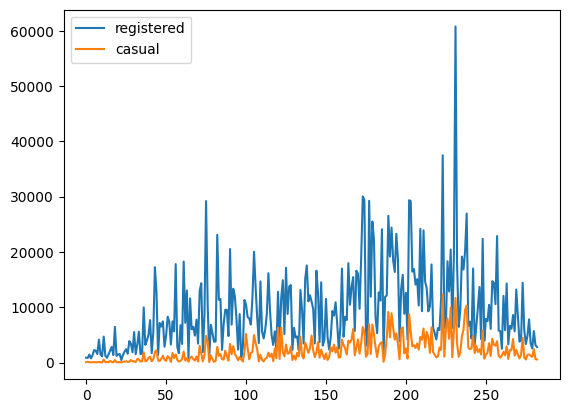

In [18]:
df_atemp = df.groupby(by=["atemp"],as_index=False)[["casual","registered","cnt"]].sum()
df_atemp.sort_values('cnt',ascending=False)

df_atemp.plot(y=["registered", "casual"],kind="line")

<Axes: >

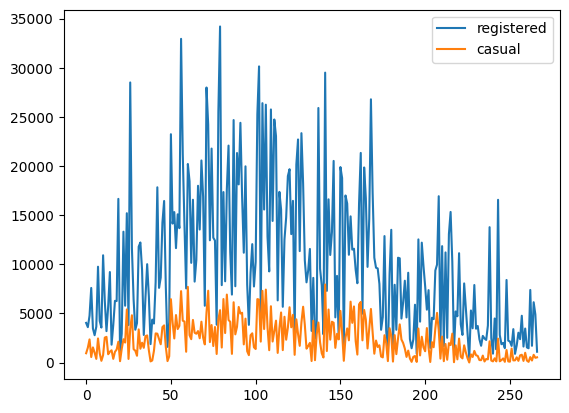

In [19]:
df_ws = df.groupby(by=["windspeed"],as_index=False)[["casual","registered","cnt"]].sum()
df_ws.sort_values('cnt',ascending=False)

df_ws.plot(y=["registered", "casual"],kind="line")

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca memengaruhi banyaknya pengguna Bike Sharing?


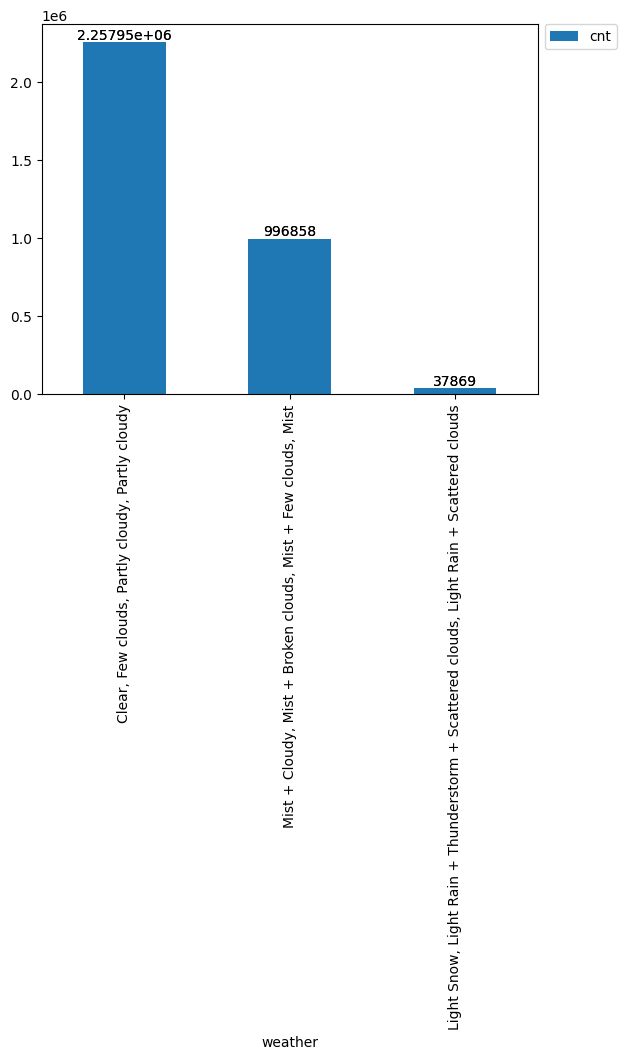

In [20]:
df_weather = df.groupby(by=["weathersit","weather"],as_index=False)[["cnt"]].sum()
viz_weather = df_weather.plot(x='weather',y=['cnt'],kind="bar",stacked=True)

for container in viz_weather.containers:
    viz_weather.bar_label(container)
viz_weather.bar_label(container)
viz_weather.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

Dari visualisasi di atas terlihat bahwa jumlah pengguna bike sharing pada saat cuaca salju atau hujan (cuaca buruk) sangat kecil dibandingkan jumlah pengguna pada saat cuaca cerah. Hal ini menunjukkan bahwa di saat cuaca cerah memungkinkan untuk mendapatkan lebih banyak user rental dibandingkan saat cuaca yg buruk

### Pertanyaan 2: Pada hari apakah pengguna banyak menggunakan layanan Bike Sharing?

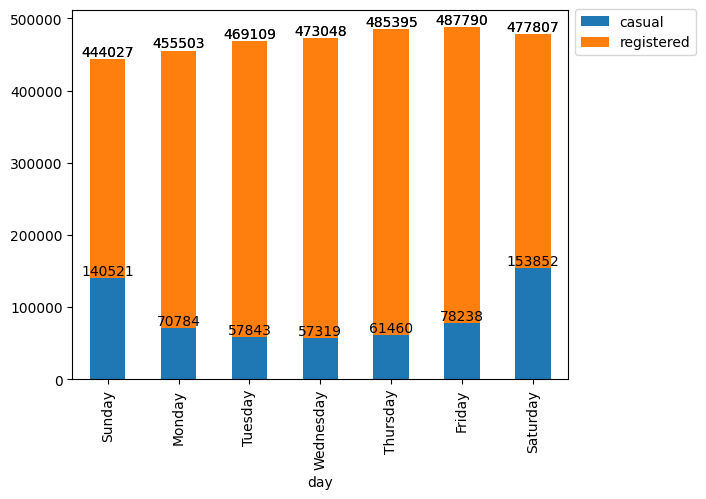

In [21]:
df_day = df.groupby(by=["weekday","day"],as_index=False)[["casual","registered"]].sum()
viz_day = df_day.plot(x='day',y=['casual','registered'],kind="bar",stacked=True)

for container in viz_day.containers:
    viz_day.bar_label(container)
viz_day.bar_label(container)
viz_day.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [ ]:
Dari visualisasi di atas terlihat bahwa secara keseluruhan, layanan bike sharing paling sering digunakan di hari Jumat. Sedangkan jika dilihat berdasarkan status akunnya, pengguna yang tidak melakukan registrasi paling sering menggunakan bike sharing saat weekend. Bisa disimpulkan bahwa pengguna bike sharing yang sudah registrasi adalah orang yang bekerja di hari senin - jumat.

## Conclusion

- Conclution pertanyaan 1 : Saat cuaca cerah lebih banyak pengguna dibandingkan saat cuaca buruk
- conclution pertanyaan 2 : Pengguna yang tidak registrasi lebih sering menggunakan layanan saat hari weekend terutama Sabtu, sedangkan pengguna yang melakukan registrasi lebih sering menggunakan layanan di hari kerja terutama di hari Jumat